### Process to do
    1. Data Ingetion
    2. EDA
    3. Text Preprocessing
    4. Model Building
    5. Evaluation
    6. Improvement
    7. Website
    8. Deploy

### Step-1. Data Ingetion

In [1]:
import numpy as np
import pandas as pd

In [11]:
def _read_data():
    return pd.read_csv('spam.csv')
df = _read_data()
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.isna().sum()
df.dropna(axis=1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.shape

(5572, 2)

### Step 2. Data Cleaning 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.columns

Index(['target', 'message'], dtype='object')

#### Now My next move is to convert target data into label encoding like ham==>`0` and spam==> `1`

In [9]:
class LabelConverter:
    def __init__(self):
        self.ham = 0
        self.spam = 1

    def decode(self, label):
        if label == self.ham:
            return 'ham'
        elif label == self.spam:
            return 'spam'
        else:
            raise ValueError(f"Unknown label: {label}")


In [10]:
label_converter = LabelConverter()

df['target'] = df['target'].apply(lambda x: label_converter.ham if x == 'ham' else label_converter.spam)

# Display the DataFrame with encoded labels
print("Encoded DataFrame:")
print(df[['target', 'target']])

Encoded DataFrame:
      target  target
0          0       0
1          0       0
2          1       1
3          0       0
4          0       0
...      ...     ...
5567       1       1
5568       0       0
5569       0       0
5570       0       0
5571       0       0

[5572 rows x 2 columns]


In [11]:

df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# df['target'] = df['target'].apply(lambda x: label_converter.decode(x))


In [13]:
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Step-3 Exploratory Data Analysi(EDA)

In [17]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\3698450164.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


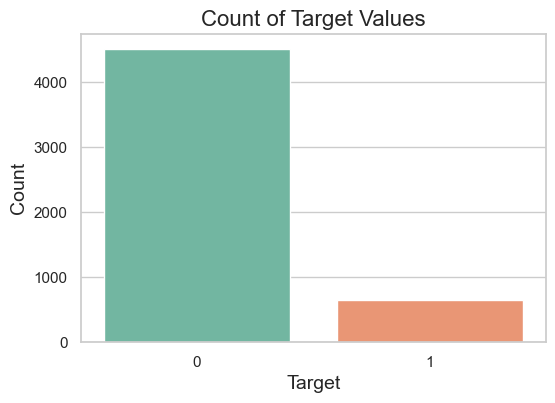

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')

plt.title('Count of Target Values', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

### Observation 
    Visualizing Imbalanced Data
    The bar plot illustrates the imbalance in the target variable, 
    with significantly more samples of one class compared to the other.
    Addressing this imbalance is crucial for unbiased model training.


In [19]:
import nltk

In [ ]:
nltk.download('punkt')

In [20]:
df['num_char'] = df.message.apply(len)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\1406342409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df.message.apply(len)


In [21]:
df

,target,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [22]:
df['word_counts'] = df.message.apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\3732055501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_counts'] = df.message.apply(lambda x:len(nltk.word_tokenize(x)))


In [23]:
df['word_counts'] 

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: word_counts, Length: 5169, dtype: int64

In [24]:
# df.message.apply(lambda x:nltk.sent_tokenize(x))
df['sentance_count'] = df.message.apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\165160116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentance_count'] = df.message.apply(lambda x:len(nltk.sent_tokenize(x)))


In [25]:
df

,target,message,num_char,word_counts,sentance_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [26]:
df.columns

Index(['target', 'message', 'num_char', 'word_counts', 'sentance_count'], dtype='object')

In [27]:
df[['num_char', 'word_counts', 'sentance_count']].describe()

,num_char,word_counts,sentance_count
count,5169.000000,5169.000000,5169.000000
mean,79.344941,18.593538,1.974076
std,58.439256,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### LeT'S Anlysis Ham And Spam Sepratly

In [28]:
#Ham Messages
df[df['target'] ==0][['num_char', 'word_counts', 'sentance_count']].describe()


,num_char,word_counts,sentance_count
count,4516.000000,4516.000000,4516.000000
mean,70.906333,17.267715,1.827724
std,56.717234,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 1][['num_char', 'word_counts', 'sentance_count']].describe()


,num_char,word_counts,sentance_count
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

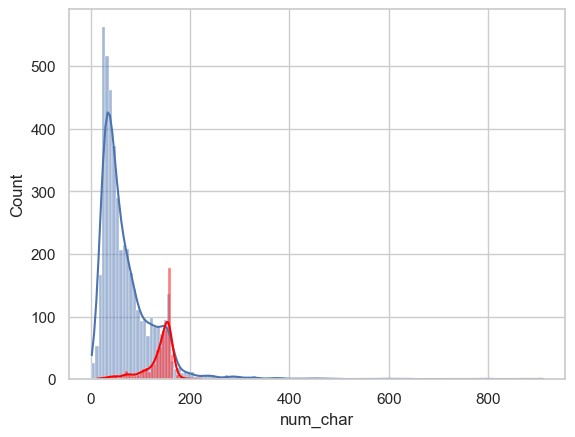

In [31]:
sns.histplot(df[df.target == 0]['num_char'],kde=True)
sns.histplot(df[df.target == 1]['num_char'],kde=True,color='red')


In [32]:
df.columns

Index(['target', 'message', 'num_char', 'word_counts', 'sentance_count'], dtype='object')

<Axes: xlabel='word_counts', ylabel='Count'>

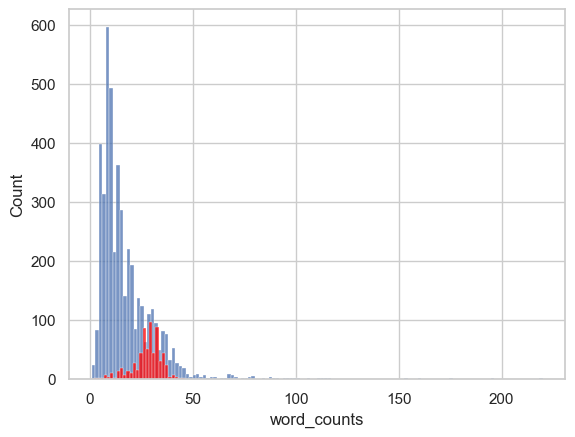

In [33]:
sns.histplot(df[df.target == 0]['word_counts'])
sns.histplot(df[df.target == 1]['word_counts'],color='red')

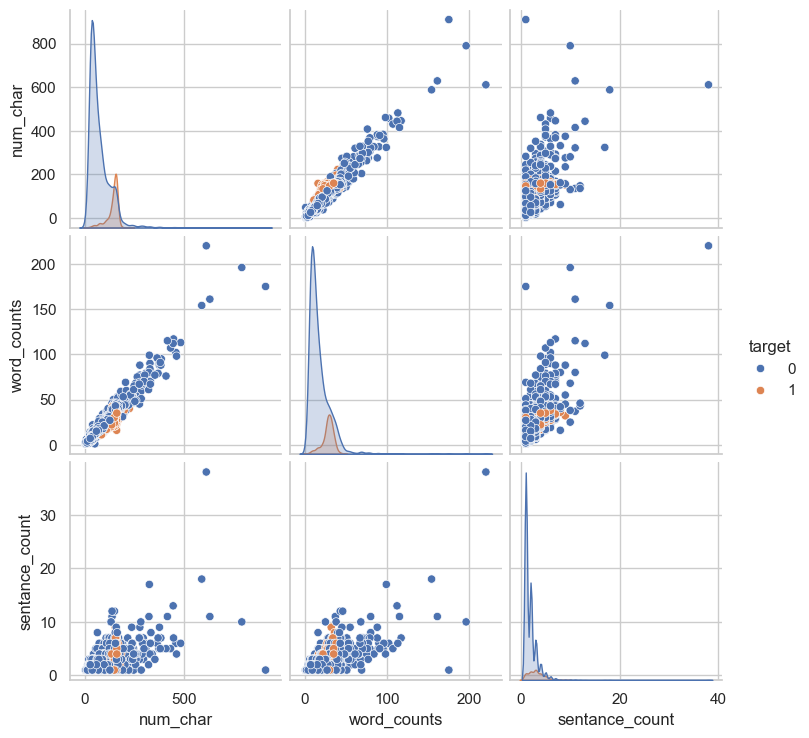

In [34]:
sns.pairplot(df, hue='target')

<Axes: >

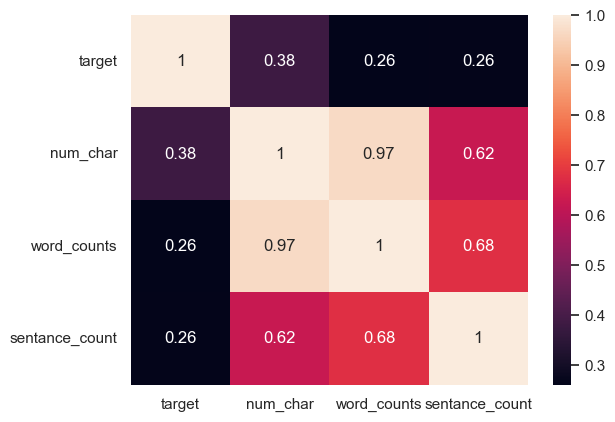

In [35]:
corr = df[['target', 'num_char', 'word_counts', 'sentance_count']]
sns.heatmap(corr.corr(), annot=True)

### Step-4 Data Preprocessing
    * Lower Case
    * Remove Emoji 
    * Sort Form
    * Tokenization
    * Removing special characters
    * Removing Stop Words and Punctuation
    * Stemming

    


In [36]:
df.head()

,target,message,num_char,word_counts,sentance_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
def transform_text(text):
    try:
        text = text.lower() #Hey .. it will help us to convert into lower case char
        text = nltk.word_tokenize(text) ## tokenize the phrases into words
        return text
    except Exception as e:
        raise e

In [38]:
transform_text('HI HOW ARE YOU')

['hi', 'how', 'are', 'you']

In [39]:
import re

def extract_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    
    return emoji_pattern.findall(text)

text = "Hey, omg! I can't believe u r here. lol, ttyl! 😊🚀❤️"
emojis = extract_emojis(text)
print("Emojis:", emojis)


Emojis: ['😊🚀❤️']


In [40]:

short_forms = {
    "asap": "as soon as possible",
    "u": "you",
    "ur":"your",
    "r": "are",
    "lol": "laugh out loud",
    "btw": "by the way",
    "omg": "oh my god",
    "idk": "I don't know",
    "fyi": "for your information",
    "brb": "be right back",
    "gtg": "got to go",
    "tmi": "too much information",
    "imho": "in my humble opinion",
    "ttyl": "talk to you later",
    "thx": "thanks",
    "np": "no problem",
    "omw": "on my way",
    "hmu": "hit me up",
    "fomo": "fear of missing out",
    "irl": "in real life",
    "tbh": "to be honest",
    "smh": "shaking my head",
    "np": "no problem",
    "imo": "in my opinion",
    "icymi": "in case you missed it",
    "afaik": "as far as I know",
    "irl": "in real life",
    "rofl": "rolling on the floor laughing",
    "afk": "away from keyboard",
    "bff": "best friends forever",
    "fwiw": "for what it's worth",
    "hbd": "happy birthday",
    "nsfw": "not safe for work",
    "oml": "oh my lord",
    "srsly": "seriously",
    "tl;dr": "too long; didn't read",
    "wtf": "what the heck",
    "yolo": "you only live once",
    "btw": "by the way",
    "omg": "oh my god",
    "idk": "I don't know",
    "fyi": "for your information",
    "imho": "in my humble opinion",
    "tbh": "to be honest",
    'wif': "with",
    'wkly':"weekly",
    'lor':"you_know",
    'da':'buddy'
}

for short_form, full_form in short_forms.items():
    text = re.sub(r'\b{}\b'.format(re.escape(short_form)), full_form, text)

In [41]:
import re

def expand_short_forms(text, short_forms):
    for short_form, full_form in short_forms.items():
        text = re.sub(r'\b{}\b'.format(re.escape(short_form)), full_form, text)
    return text

# Example usage
text_example = "I luv u, until u wil dies  hahaha btw imho it's omg. idk if u'll be there, gtg now. ttyl!"
expanded_text = expand_short_forms(text_example, short_forms)

print("Original text:", text_example)
print("Expanded text:", expanded_text)


Original text: I luv u, until u wil dies  hahaha btw imho it's omg. idk if u'll be there, gtg now. ttyl!
Expanded text: I luv you, until you wil dies  hahaha by the way in my humble opinion it's oh my god. I don't know if you'll be there, got to go now. talk to you later!


In [42]:
# Compile emoji pattern
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed Characters
                           u"\U0001F600-\U0001F636"  # Emoticons & Smileys
                           u"\U0001F681-\U0001F6C5"  # Transport & Map Symbols
                           u"\U0001F300-\U0001F567"  # Other Symbols
                           u"\U0001F004-\U0001F0CF"  # Mahjong Tiles
                           u"\U0001F170-\U0001F251"  # Enclosed Alphanumeric Supplement
                           u"\U0001F1E6-\U0001F1FF"  # Regional Indicator Symbols
                           u"\U0001F910-\U0001F918"  # Face Hand Symbols
                           u"\U0001F919-\U0001F91E"  # Zodiac Signs
                           u"\U0001F920-\U0001F927"  # Hand Symbols
                           u"\U0001F930-\U0001F939"  # Food Symbols
                           u"\U0001F940-\U0001F945"  # Animal Symbols
                           u"\U0001F950-\U0001F96B"  # Other Symbols
                           u"\U0001F980-\U0001F991"  # Plant Symbols
                           u"\U0001F992-\U0001F9AA"  # Object Symbols
                           "]+", flags=re.UNICODE)


In [43]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [82]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    text = text.lower()
    
    for short_form, full_form in short_forms.items():
        text = re.sub(r'\b{}\b'.format(re.escape(short_form)), full_form, text)
    
    # text = emoji_pattern.sub(r'', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    words = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word.lower() not in stop_words]
    
    return ' '.join(words)

# # Assuming df is your DataFrame with a column 'text_column' containing the text data
# # and short_forms is your dictionary of short forms

# # Apply the preprocess_text function to the 'text_column'
# df['processed_text'] = df['text_column'].apply(lambda x: preprocess_text(x, short_forms))

# # Specify the file path where you want to save the CSV file
# file_path = 'processed_data.csv'

# # Save the DataFrame to a CSV file
# df.to_csv(file_path, index=False)

# print(f'Processed DataFrame saved to {file_path}')


In [83]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Replace short forms with space before and after to ensure they are complete words
    for short_form, full_form in short_forms.items():
        text = re.sub(r'\b{}\b'.format(re.escape(short_form)), full_form, text)
    
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenize words
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the processed words back into a sentence
    processed_text = ' '.join(words)
    
    return processed_text    



In [84]:
input_text = "Hey, omg! I can't believe u r here. @@##lol, ttyl! 😊🚀❤️"
processed_text = preprocess_text(input_text)
print("Processed Text:", processed_text)


Processed Text: hey oh god cant believe laugh loud talk later


In [85]:
input_text = "Hello, @world! This is a until as #sample text with $special characters."
processed_text = preprocess_text(input_text)
print("Processed Text:", processed_text)


Processed Text: hello world sample text special character


In [86]:
preprocess_text(df.message[2])

'free entry 2 weekly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s'

In [87]:
df.message[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [88]:
df['preprocess_data'] = df.message.apply(preprocess_text)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\3701247930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocess_data'] = df.message.apply(preprocess_text)


In [89]:
df.preprocess_data.head()

0    go jurong point crazy available bugis n great ...
1                                    ok lar joking oni
2    free entry 2 weekly comp win fa cup final tkts...
3                      dun say early hor c already say
4             nah dont think go usf life around though
Name: preprocess_data, dtype: object

In [90]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [91]:
df.target

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

In [92]:
spam_wc = wc.generate(df[df['target'] == 1]['preprocess_data'].str.cat(sep=' '))

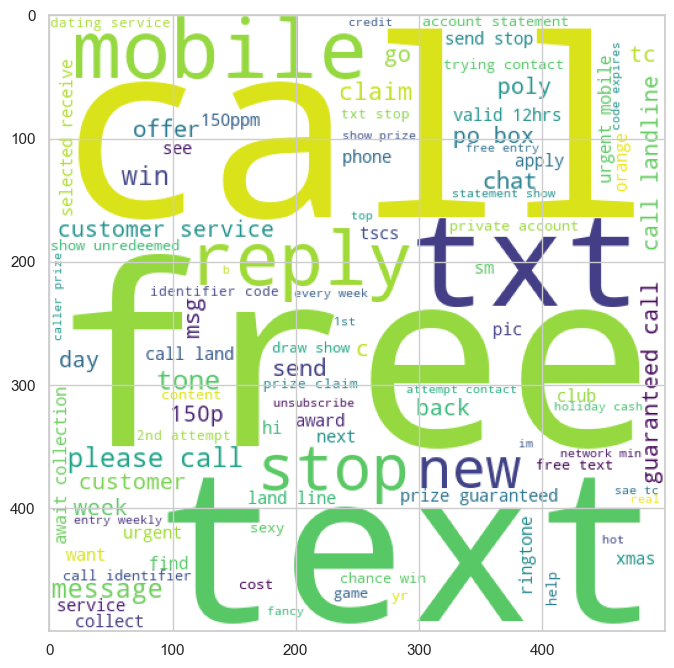

In [93]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)

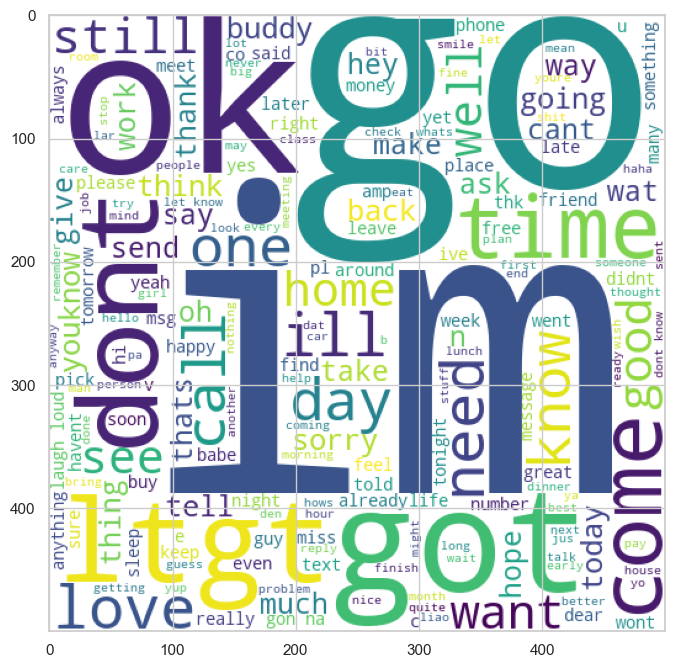

In [94]:
ham_wc = wc.generate(df[df['target'] == 0]['preprocess_data'].str.cat(sep=' '))
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)

In [95]:
# df.message.apply(lambda x:nltk.sent_tokenize(x))
df['tf_num_char'] = df.preprocess_data.apply(len)
df['tf_word_counts'] = df.preprocess_data.apply(lambda x:len(nltk.word_tokenize(x)))
df['tf_sentance_count'] = df.preprocess_data.apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\2538791711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tf_num_char'] = df.preprocess_data.apply(len)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\2538791711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tf_word_counts'] = df.preprocess_data.apply(lambda x:len(nltk.word_tokenize(x)))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\2538791711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [96]:
df

,target,message,num_char,word_counts,sentance_count,preprocess_data,tf_num_char,tf_word_counts,tf_sentance_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...,82,16,1
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking oni,17,4,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 weekly comp win fa cup final tkts...,137,23,1
3,0,U dun say so early hor... U c already then say...,49,13,1,dun say early hor c already say,31,7,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think go usf life around though,40,8,1
...,...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tried 2 contact 750 pound prize 2 cla...,106,18,1
5568,0,Will ü b going to esplanade fr home?,36,9,1,b going esplanade fr home,25,5,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood soany suggestion,26,4,1
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like id interested buying s...,81,14,1


In [97]:
df.columns

Index(['target', 'message', 'num_char', 'word_counts', 'sentance_count',
       'preprocess_data', 'tf_num_char', 'tf_word_counts',
       'tf_sentance_count'],
      dtype='object')

In [98]:
# i want to see the visual comparision  represention
# 'num_char' => 'tf_num_char',# tf means transform data
# 'word_counts'==>'tf_word_counts', 
# 'sentance_count'==>'tf_sentance_count',


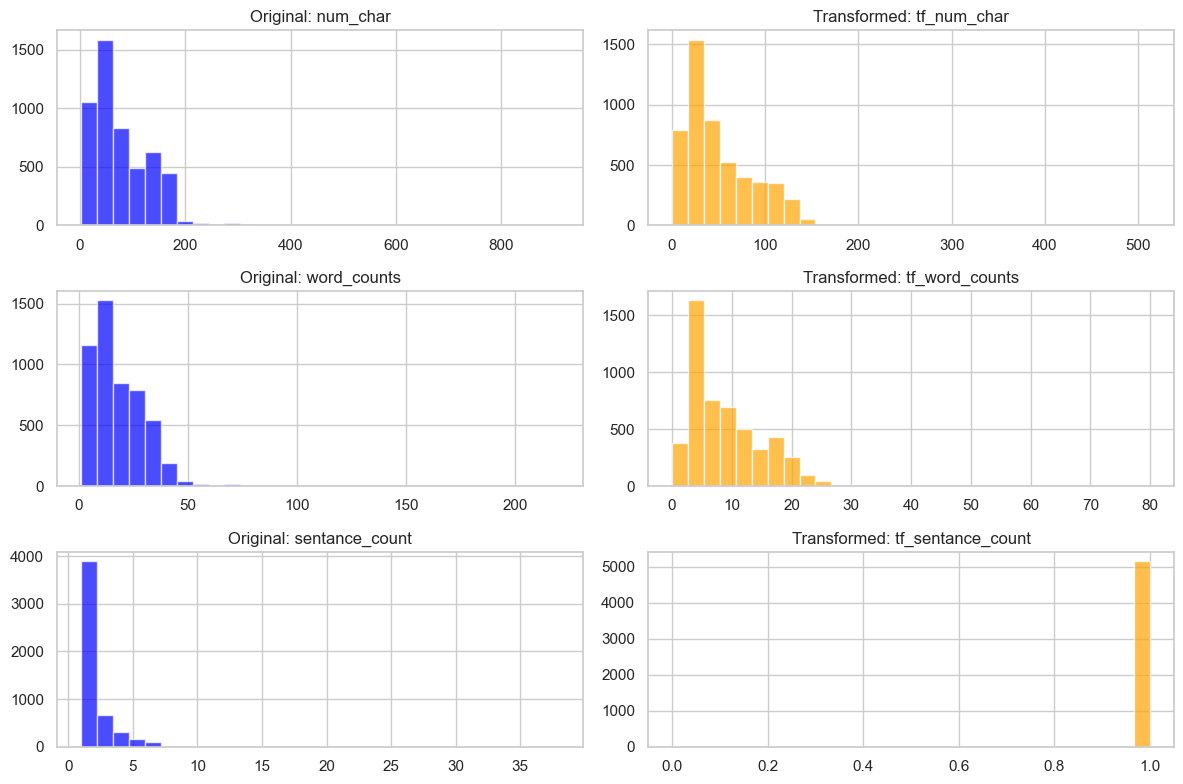

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with the preprocessed data

# Original features
original_features = ['num_char', 'word_counts', 'sentance_count']

# Transformed features
transformed_features = ['tf_num_char', 'tf_word_counts', 'tf_sentance_count']

# Plot histograms for each feature
plt.figure(figsize=(12, 8))

for i in range(len(original_features)):
    plt.subplot(3, 2, i*2+1)
    plt.hist(df[original_features[i]], bins=30, color='blue', alpha=0.7)
    plt.title(f'Original: {original_features[i]}')
    
    plt.subplot(3, 2, i*2+2)
    plt.hist(df[transformed_features[i]], bins=30, color='orange', alpha=0.7)
    plt.title(f'Transformed: {transformed_features[i]}')

plt.tight_layout()
plt.show()


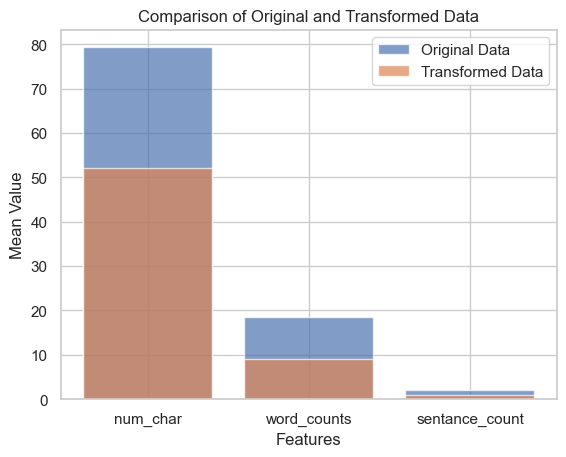

In [100]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Replace df['num_char'], df['word_counts'], df['sentance_count'] with your actual column names

# Original data
original_data = [df['num_char'].mean(), df['word_counts'].mean(), df['sentance_count'].mean()]

# Transformed data
transformed_data = [df['tf_num_char'].mean(), df['tf_word_counts'].mean(), df['tf_sentance_count'].mean()]

labels = ['num_char', 'word_counts', 'sentance_count']

# Bar plot for visual comparison
plt.bar(labels, original_data, label='Original Data', alpha=0.7)
plt.bar(labels, transformed_data, label='Transformed Data', alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Comparison of Original and Transformed Data')
plt.legend()
plt.show()


In [101]:
df[df['target']==1]['preprocess_data']

2       free entry 2 weekly comp win fa cup final tkts...
5       freemsg hey darling 3 week word back id like f...
8       winner valued network customer selected receiv...
9       mobile 11 month entitled update latest colour ...
11      six chance win cash 100 20000 pound txt csh11 ...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    asked 3mobile 0870 chatlines inclu free min in...
5547    contract mobile 11 mnths latest motorola nokia...
5566    reminder o2 get 250 pound free call credit det...
5567    2nd time tried 2 contact 750 pound prize 2 cla...
Name: preprocess_data, Length: 653, dtype: object

In [102]:
spam_corpus = []
for msg in df[df['target']==1]['preprocess_data'].tolist():
    for word in msg.split():
        spam_corpus.append(word) 

In [103]:
spam_corpus

['free',
 'entry',
 '2',
 'weekly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 '150',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 '900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobile',
 '11',
 'month',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 '10

In [104]:
len(spam_corpus)

10586

In [105]:
ham_corpus = []
for msg in df[df['target']==0]['preprocess_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word) 

In [106]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gon',
 'na',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 '2',
 'spell',
 'name',
 'yes',
 'v',
 'nau

In [107]:
len(ham_corpus)

36002

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\3714241450.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=ham_df, palette='rainbow')


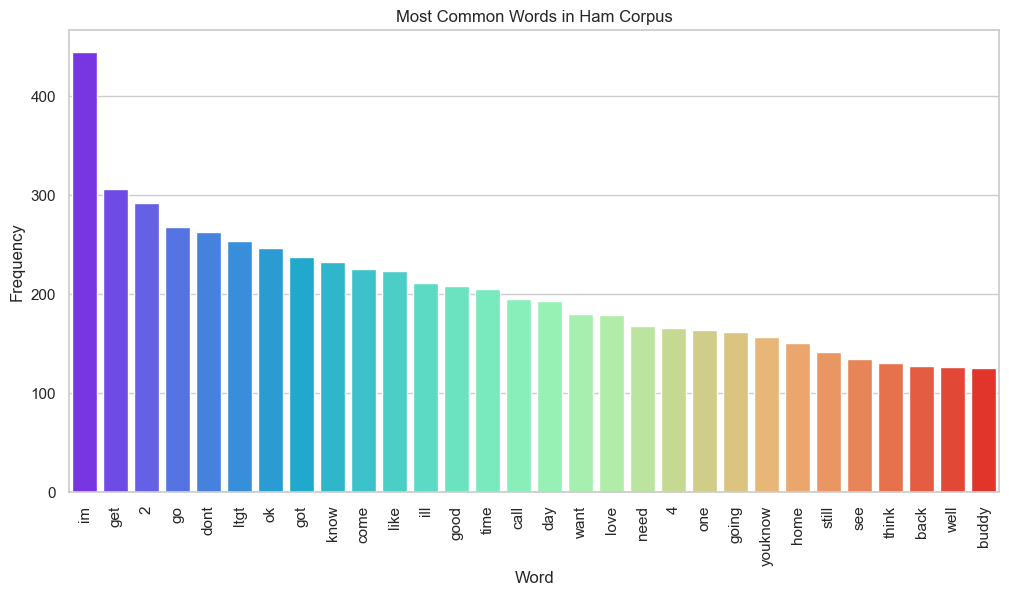

In [108]:
from collections import Counter

# Count the occurrences of each element in ham_corpus
ham_counter = Counter(ham_corpus)

# Create a DataFrame from the most common 30 elements in ham_corpus
ham_df = pd.DataFrame(ham_counter.most_common(30), columns=['Word', 'Frequency'])

# Plot the bar plot with a rainbow color map
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=ham_df, palette='rainbow')
plt.title('Most Common Words in Ham Corpus')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()


In [78]:
spam_corpus = []
for msg in df[df['target']==1]['preprocess_data'].tolist():
    for word in msg.split():
        spam_corpus.append(word) 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18988\3754493569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=ham_df, palette='rainbow')


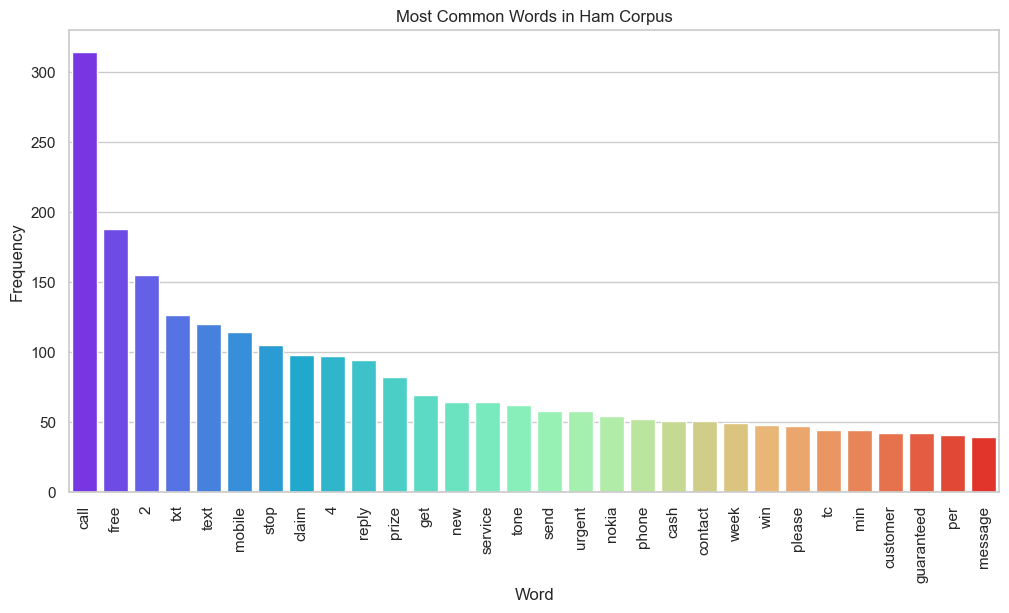

In [109]:
from collections import Counter

# Count the occurrences of each element in ham_corpus
spam_counter = Counter(spam_corpus)

# Create a DataFrame from the most common 30 elements in ham_corpus
ham_df = pd.DataFrame(spam_counter.most_common(30), columns=['Word', 'Frequency'])

# Plot the bar plot with a rainbow color map
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=ham_df, palette='rainbow')
plt.title('Most Common Words in Ham Corpus')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()


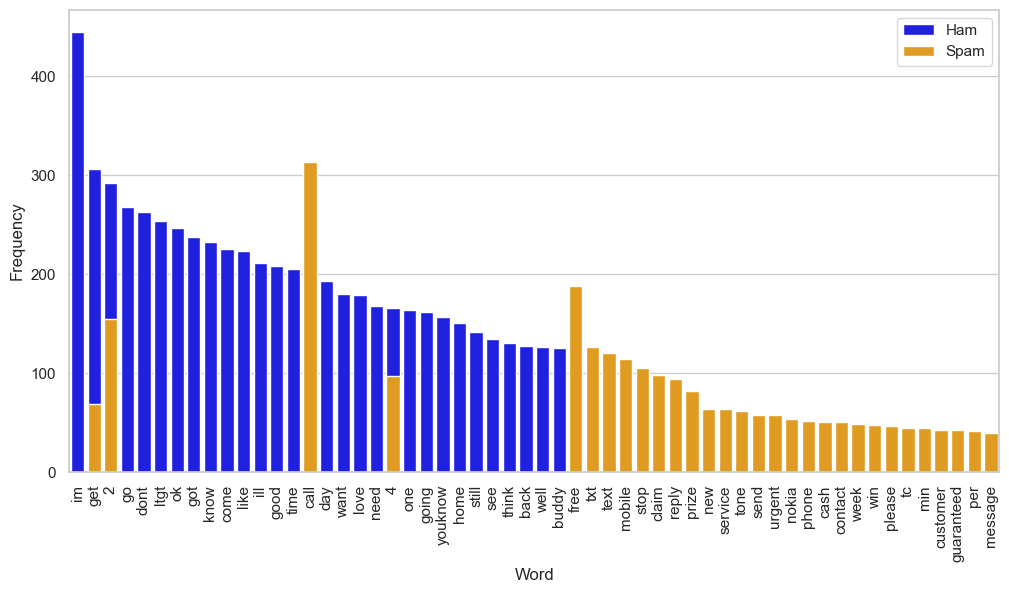

In [110]:
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# Count the occurrences of each element in ham_corpus and spam_corpus
ham_counter = Counter(ham_corpus)
spam_counter = Counter(spam_corpus)

# Create a DataFrame from the most common 30 elements in each corpus
ham_df = pd.DataFrame(ham_counter.most_common(30), columns=['Word', 'Frequency'])
spam_df = pd.DataFrame(spam_counter.most_common(30), columns=['Word', 'Frequency'])

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=ham_df, color='blue', label='Ham')
sns.barplot(x='Word', y='Frequency', data=spam_df, color='orange', label='Spam')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


In [111]:
df.isnull().sum()

target               0
message              0
num_char             0
word_counts          0
sentance_count       0
preprocess_data      0
tf_num_char          0
tf_word_counts       0
tf_sentance_count    0
dtype: int64

In [114]:
ready_to_coock_data = df[["target",'preprocess_data']]
ready_to_coock_data.head()

,target,preprocess_data
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking oni
2,1,free entry 2 weekly comp win fa cup final tkts...
3,0,dun say early hor c already say
4,0,nah dont think go usf life around though


In [115]:
ready_to_coock_data.to_csv('ready_to_coock_data.csv',index=False)

In [1]:
from sklarn.model_selection import train_teat_split

ModuleNotFoundError: No module named 'sklarn'

In [ ]:
def find_all_acronyms(text):
    # Regex to find acronyms (words in uppercase)
    return re.findall(r'\b[A-Z]{2,}\b', text)

# Applying the function to all text in the dataframe
all_acronyms = set()
for column in df.columns:
    for text in df[column]:
        if isinstance(text, str):
            acronyms_in_text = find_all_acronyms(text)
            all_acronyms.update(acronyms_in_text)

all_acronyms

In [ ]:
import pandas as pd
import re

# Load the file
file_path = 'spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')

# Function to find all acronyms and their potential full forms
def find_acronyms(text):
    # Regex to find acronyms (words in uppercase)
    acronyms = re.findall(r'\b[A-Z]{2,}\b', text)

    # Dictionary to store acronyms and their full forms
    acronym_dict = {}
    
    for acronym in acronyms:
        # Find potential full form preceding the acronym
        # Example pattern: "Full Form (FF)"
        pattern = r'(\b[a-zA-Z0-9\s]+)\s+\('+ acronym +r'\)'
        match = re.search(pattern, text)

        if match:
            # If a full form is found, add it to the dictionary
            acronym_dict[acronym] = match.group(1).strip()
        else:
            # If no full form is found, still add the acronym
            acronym_dict[acronym] = None

    return acronym_dict

# Applying the function to all text in the dataframe
acronym_results = {}
for column in df.columns:
    for text in df[column]:
        if isinstance(text, str):
            acronyms_in_text = find_acronyms(text)
            acronym_results.update(acronyms_in_text)

# Filtering out acronyms without identified full forms
acronym_results = {acronym: full_form for acronym, full_form in acronym_results.items() if full_form}

acronym_results


In [ ]:
acronym_results

In [ ]:
len(all_acronyms)

In [13]:
from user_agent import parse  # Assuming a library like 'user_agent' is used

def process_request(request, date, route_id):
    # Extracting user agent information
    ua = request.headers.get("User-Agent")
    user_agent = parse(ua)
    device = user_agent.device.family
    browser = user_agent.browser.family
    browser_ver = user_agent.browser.version_string

    # Checking query parameters
    is_ga = bool(request.query_params.get("cid"))
    is_clickID = bool(request.query_params.get("click_id"))

    # Forming the result string
    result_string = f"{date}-{device}-{browser}-{browser_ver}-{is_ga}-{is_clickID}-{route_id}"

    return result_string

# Example usage
request_headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"}
query_parameters = {"cid": "123456", "click_id": "789abc"}
current_date = "2024-01-19"
route_id = "home"

example_result = process_request({"headers": request_headers, "query_params": query_parameters}, current_date, route_id)
print(example_result)


ModuleNotFoundError: No module named 'user_agent'

In [1]:
import os
os.chdir('..')
%pwd

'f:\\End_To_End_project\\Ham_Spam_Classifier(ETE)'

In [2]:
from src.utils import read_yaml_file


In [3]:
ROOT_DIR = os.getcwd()
CONFIG_DIR_NAME:str = 'config'
CONFIG_FILE_NAME:str = 'config.yaml'

CONFIG_FILE_PATH = os.path.join(ROOT_DIR, CONFIG_DIR_NAME, CONFIG_FILE_NAME)
CONFIG_FILE_PATH

'f:\\End_To_End_project\\Ham_Spam_Classifier(ETE)\\config\\config.yaml'

In [4]:
CONFIG_FILE = read_yaml_file(CONFIG_FILE_PATH)
CONFIG_FILE

{'Data_Api': 'kaggle datasets download -d uciml/sms-spam-collection-dataset',
 'columns_name': {'feature': 'Text_Message', 'label': 'Target'},
 'columns': ['Text_Message', 'Target'],
 'columns_data_type': {'Text_Message': 'object', 'Target': 'object'}}

In [7]:
CONFIG_FILE['columns_name']['label']

'Target'

In [8]:
FEATURES_NAME:str = CONFIG_FILE['columns_name']['feature']
TARGET_NAME:str = CONFIG_FILE['columns_name']['label']

In [9]:
FEATURES_NAME

'Text_Message'

In [10]:
TARGET_NAME

'Target'